---

In [10]:
import pandas as pd
import re

# Đọc file .txt
file_path = 'raw_data.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    raw_data = file.readlines()

# Tạo dictionary để lưu dữ liệu sạch
data_cleaned = {}

# Hàm làm sạch từng dòng
def clean_line(line):
    key, value = line.split(':')
    key, value = key.strip(), value.strip()[1:-1].split()
    value = [float(v) for v in value]
    if len(value) < 34:
        value = [0.] * (34 - len(value)) + value 
    return key, value

# Xử lý các dòng dữ liệu
for i, line in enumerate(raw_data):
    if '#' in line or line == '\n':
        continue
    key, value = clean_line(line)
    data_cleaned[key] = value

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data_cleaned)

# Lưu lại thành file CSV
df.to_csv('cleaned_macroeconomic_data.csv', index=False)


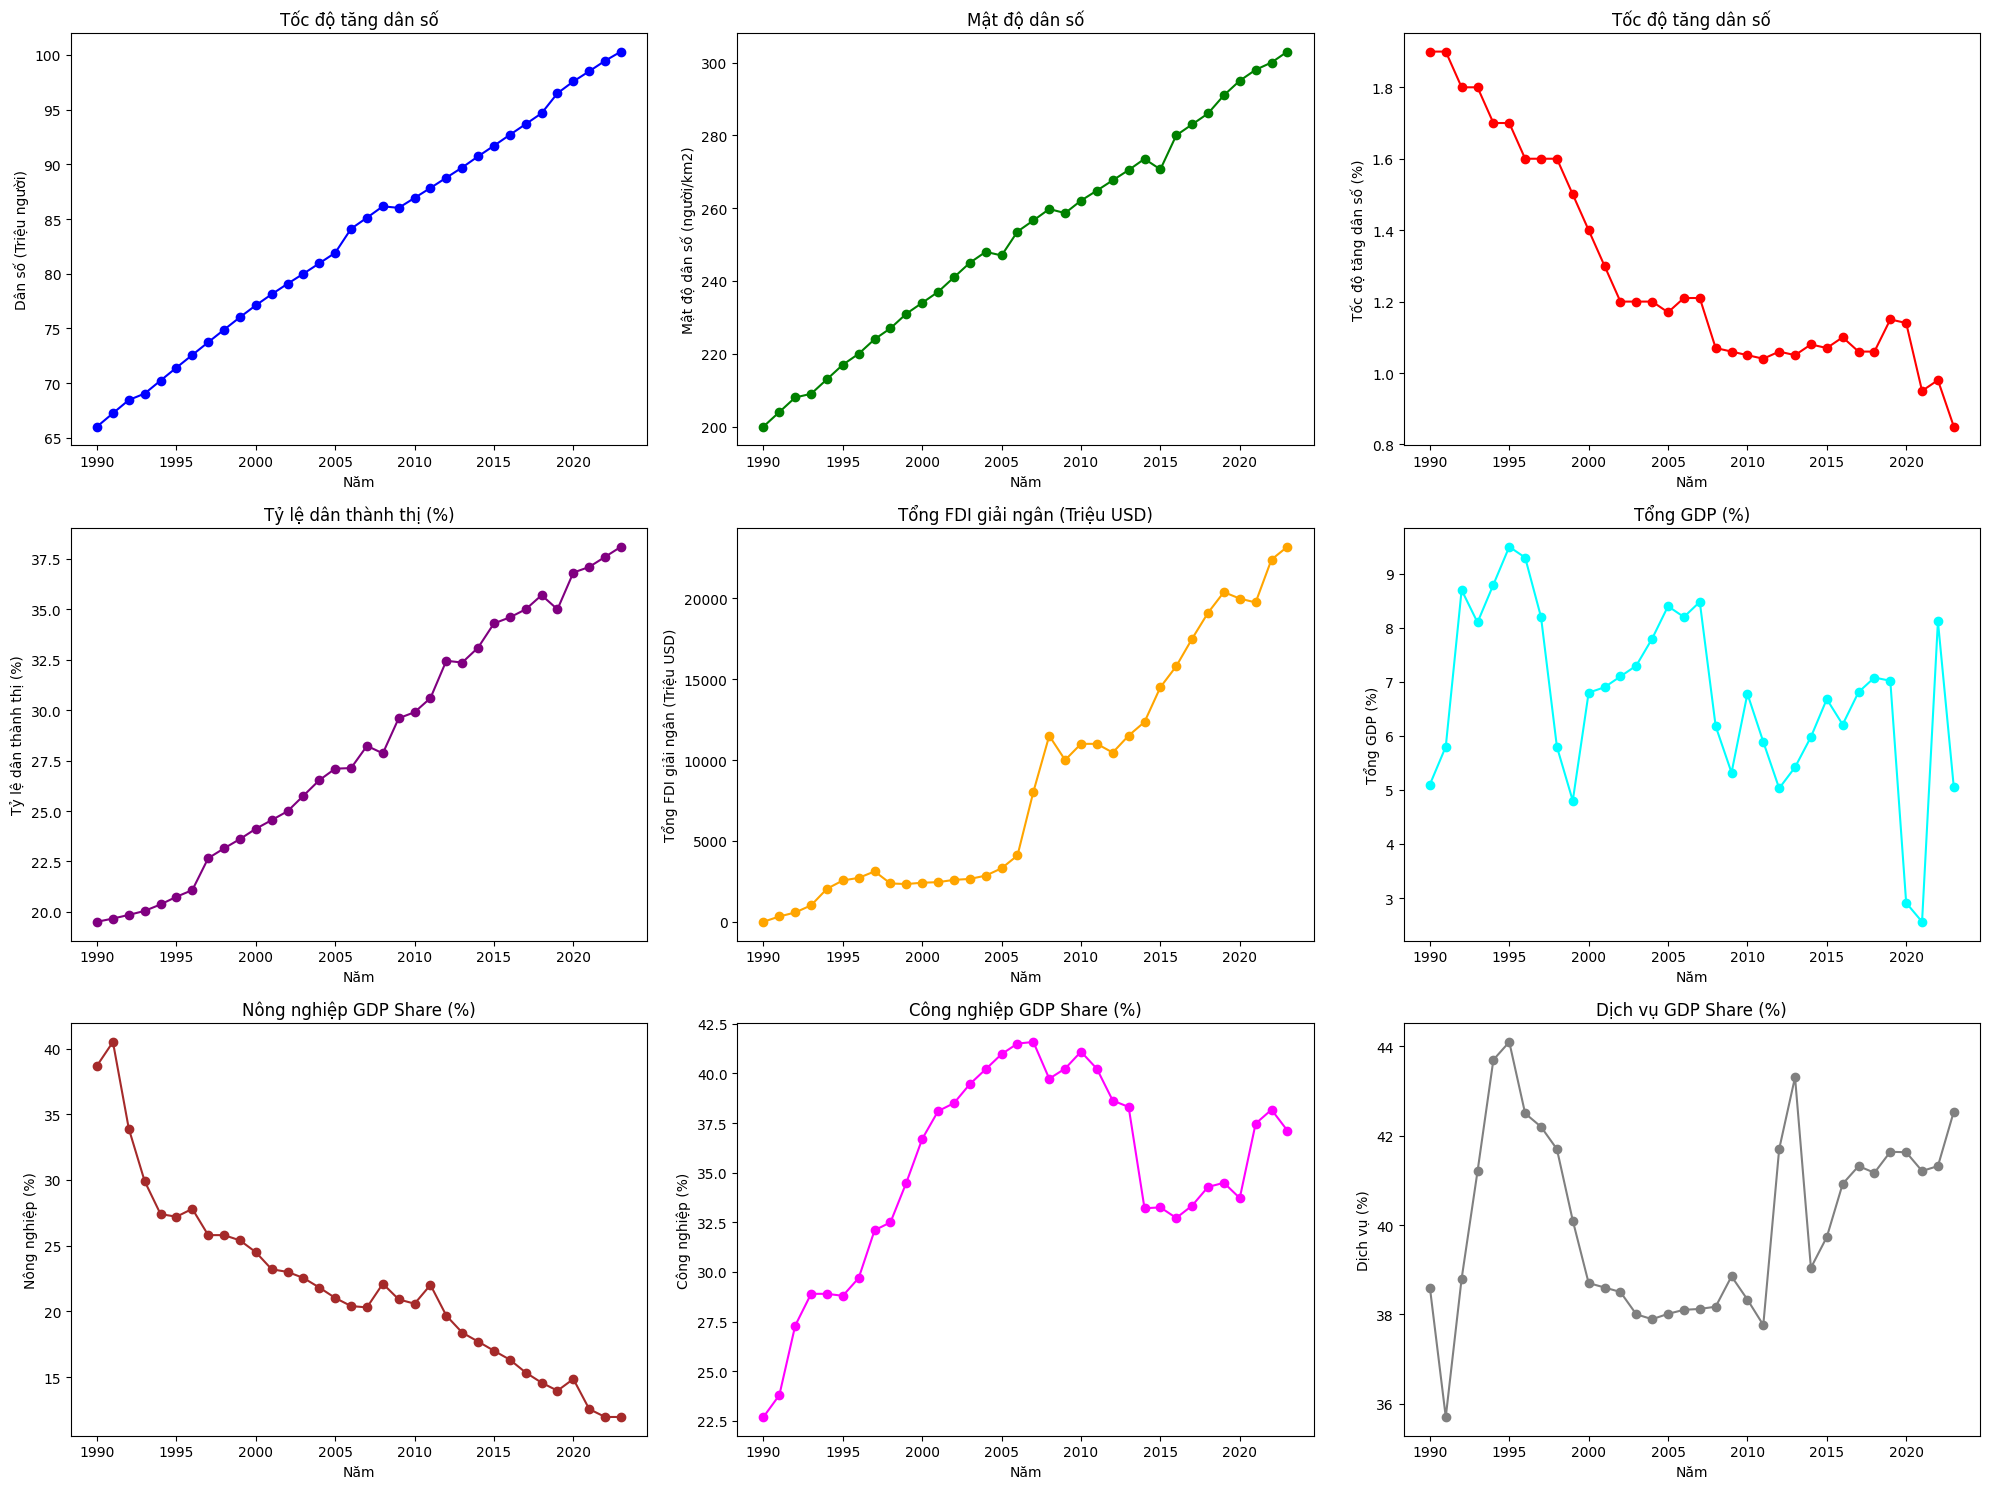

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu đã làm sạch từ CSV
df = pd.read_csv('cleaned_macroeconomic_data.csv')

# Thiết lập kích thước tổng hợp cho các biểu đồ
plt.figure(figsize=(20, 15))

# Biểu đồ 1: Dân số theo thời gian
plt.subplot(3, 3, 1)
plt.plot(df['Năm'], df['Dân số (Triệu người)'], color='blue', marker='o')
plt.title('Tốc độ tăng dân số')
plt.xlabel('Năm')
plt.ylabel('Dân số (Triệu người)')

# Biểu đồ 2: Mật độ dân số theo năm
plt.subplot(3, 3, 2)
plt.plot(df['Năm'], df['Mật độ dân số (người/km2)'], color='green', marker='o')
plt.title('Mật độ dân số')
plt.xlabel('Năm')
plt.ylabel('Mật độ dân số (người/km2)')

# Biểu đồ 3: Tỷ lệ tăng trưởng dân số
plt.subplot(3, 3, 3)
plt.plot(df['Năm'], df['Tốc độ tăng dân số (%)'], color='red', marker='o')
plt.title('Tốc độ tăng dân số')
plt.xlabel('Năm')
plt.ylabel('Tốc độ tăng dân số (%)')

# Biểu đồ 4: Tỷ lệ dân thành thị
plt.subplot(3, 3, 4)
plt.plot(df['Năm'], df['Tỷ lệ dân thành thị (%)'], color='purple', marker='o')
plt.title('Tỷ lệ dân thành thị (%)')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ dân thành thị (%)')

# Biểu đồ 5: FDI giải ngân
plt.subplot(3, 3, 5)
plt.plot(df['Năm'], df['Tổng FDI giải ngân (Triệu USD)'], color='orange', marker='o')
plt.title('Tổng FDI giải ngân (Triệu USD)')
plt.xlabel('Năm')
plt.ylabel('Tổng FDI giải ngân (Triệu USD)')

# Biểu đồ 6: Tăng trưởng GDP thực tế
plt.subplot(3, 3, 6)
plt.plot(df['Năm'], df['Tổng GDP (%)'], color='cyan', marker='o')
plt.title('Tổng GDP (%)')
plt.xlabel('Năm')
plt.ylabel('Tổng GDP (%)')

# Biểu đồ 7: Cơ cấu GDP theo ngành (Nông nghiệp)
plt.subplot(3, 3, 7)
plt.plot(df['Năm'], df['Nông nghiệp (%)'], color='brown', marker='o')
plt.title('Nông nghiệp GDP Share (%)')
plt.xlabel('Năm')
plt.ylabel('Nông nghiệp (%)')

# Biểu đồ 8: Cơ cấu GDP theo ngành (Công nghiệp)
plt.subplot(3, 3, 8)
plt.plot(df['Năm'], df['Công nghiệp (%)'], color='magenta', marker='o')
plt.title('Công nghiệp GDP Share (%)')
plt.xlabel('Năm')
plt.ylabel('Công nghiệp (%)')

# Biểu đồ 9: Cơ cấu GDP theo ngành (Dịch vụ)
plt.subplot(3, 3, 9)
plt.plot(df['Năm'], df['Dịch vụ (%)'], color='gray', marker='o')
plt.title('Dịch vụ GDP Share (%)')
plt.xlabel('Năm')
plt.ylabel('Dịch vụ (%)')

# Tự động điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.savefig('macroeconomic_analysis.png')
# plt.show()

# Save fig
plt.savefig('view3.png')

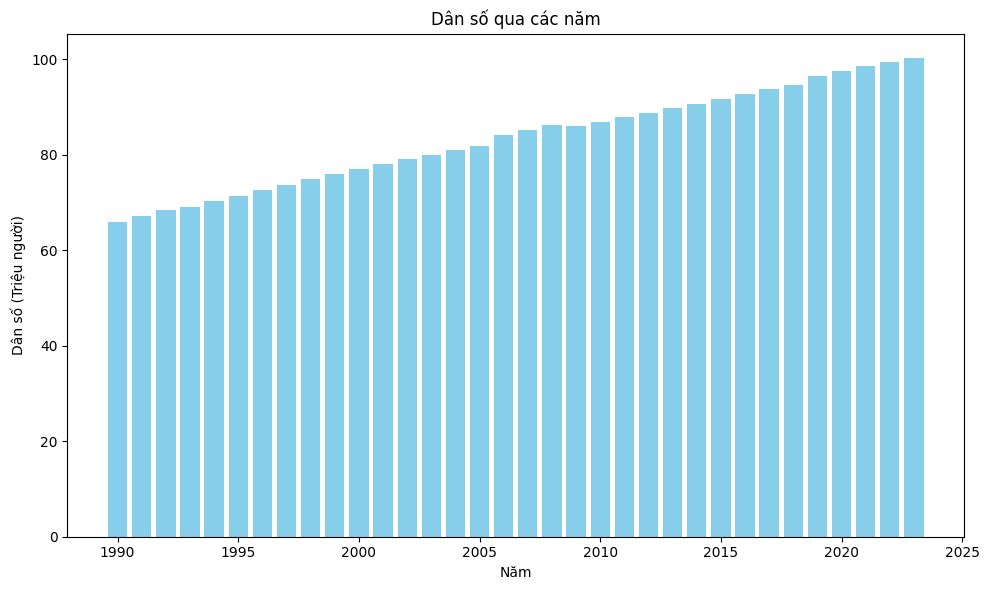

In [19]:
import matplotlib.pyplot as plt

# Biểu đồ cột: Dân số qua các năm
plt.figure(figsize=(10, 6))
plt.bar(df['Năm'], df['Dân số (Triệu người)'], color='skyblue')
plt.title('Dân số qua các năm')
plt.xlabel('Năm')
plt.ylabel('Dân số (Triệu người)')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


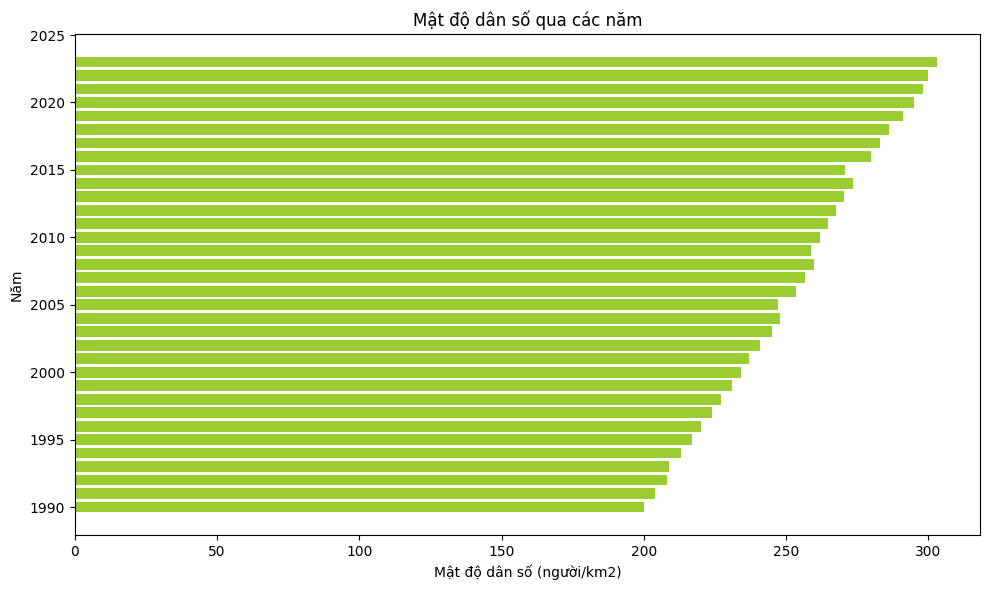

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(df['Năm'], df['Mật độ dân số (người/km2)'], color='yellowgreen')
plt.title('Mật độ dân số qua các năm')
plt.xlabel('Mật độ dân số (người/km2)')
plt.ylabel('Năm')
plt.tight_layout()
plt.show()

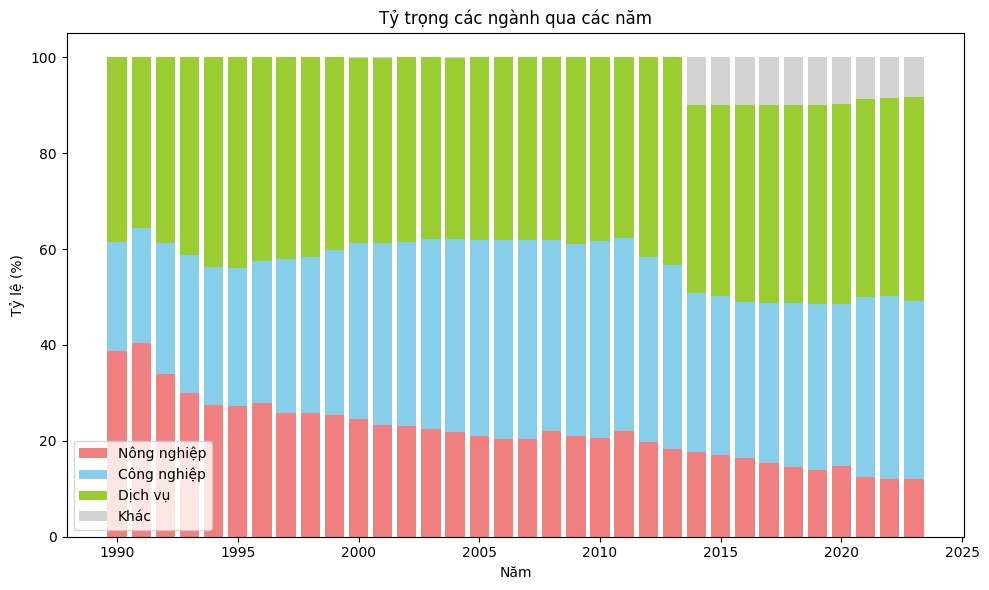

In [27]:
import numpy as np

# Chọn 3 thành phần: Nông nghiệp, Công nghiệp, Dịch vụ
years = df['Năm']
agriculture = df['Nông nghiệp (%)']
industry = df['Công nghiệp (%)']
services = df['Dịch vụ (%)']
other = 100 - agriculture - industry - services

plt.figure(figsize=(10, 6))
plt.bar(years, agriculture, label='Nông nghiệp', color='lightcoral')
plt.bar(years, industry, bottom=agriculture, label='Công nghiệp', color='skyblue')
plt.bar(years, services, bottom=np.array(agriculture) + np.array(industry), label='Dịch vụ', color='yellowgreen')
plt.bar(years, other, bottom=np.array(agriculture) + np.array(industry) + np.array(services), label='Khác', color='lightgray')

plt.title('Tỷ trọng các ngành qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ (%)')
plt.legend()
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

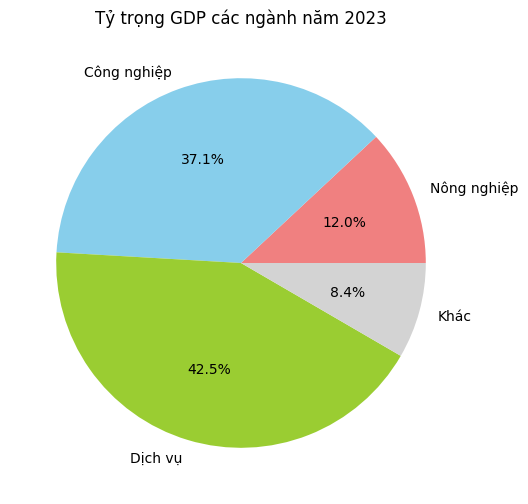

In [31]:
# Biểu đồ tròn cho GDP các ngành trong một năm cụ thể (ví dụ 1991)
year = 2023
row = df[df['Năm'] == year]
labels = ['Nông nghiệp', 'Công nghiệp', 'Dịch vụ', 'Khác']
sizes = [row['Nông nghiệp (%)'].values[0], row['Công nghiệp (%)'].values[0], row['Dịch vụ (%)'].values[0], 100 - row['Nông nghiệp (%)'].values[0] - row['Công nghiệp (%)'].values[0] - row['Dịch vụ (%)'].values[0]]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'yellowgreen', 'lightgray'])
plt.title(f'Tỷ trọng GDP các ngành năm {year}')
plt.show()

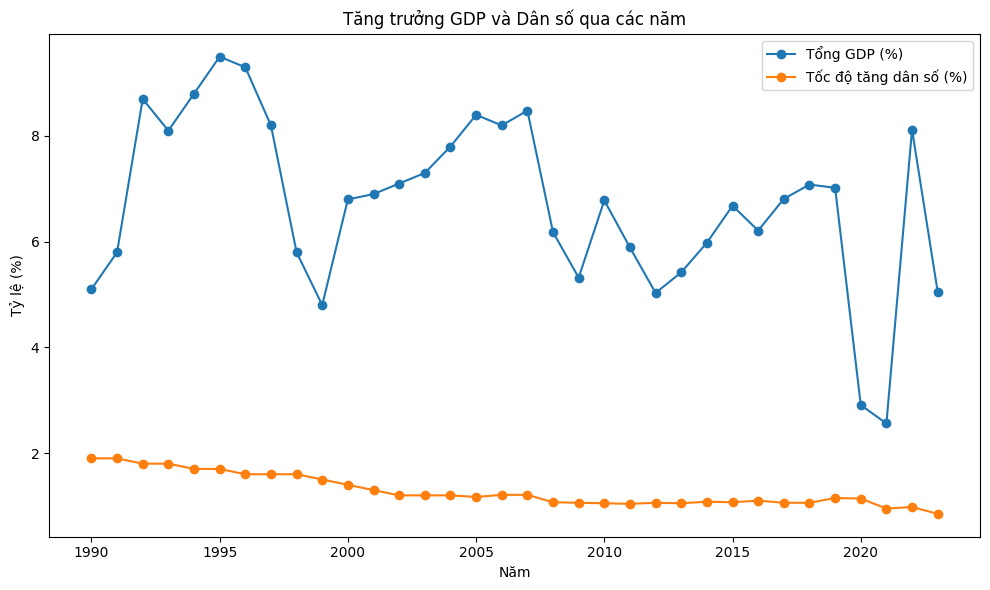

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['Năm'], df['Tổng GDP (%)'], label='Tổng GDP (%)', marker='o')
plt.plot(df['Năm'], df['Tốc độ tăng dân số (%)'], label='Tốc độ tăng dân số (%)', marker='o')

plt.title('Tăng trưởng GDP và Dân số qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ (%)')
plt.legend()
plt.tight_layout()
plt.show()

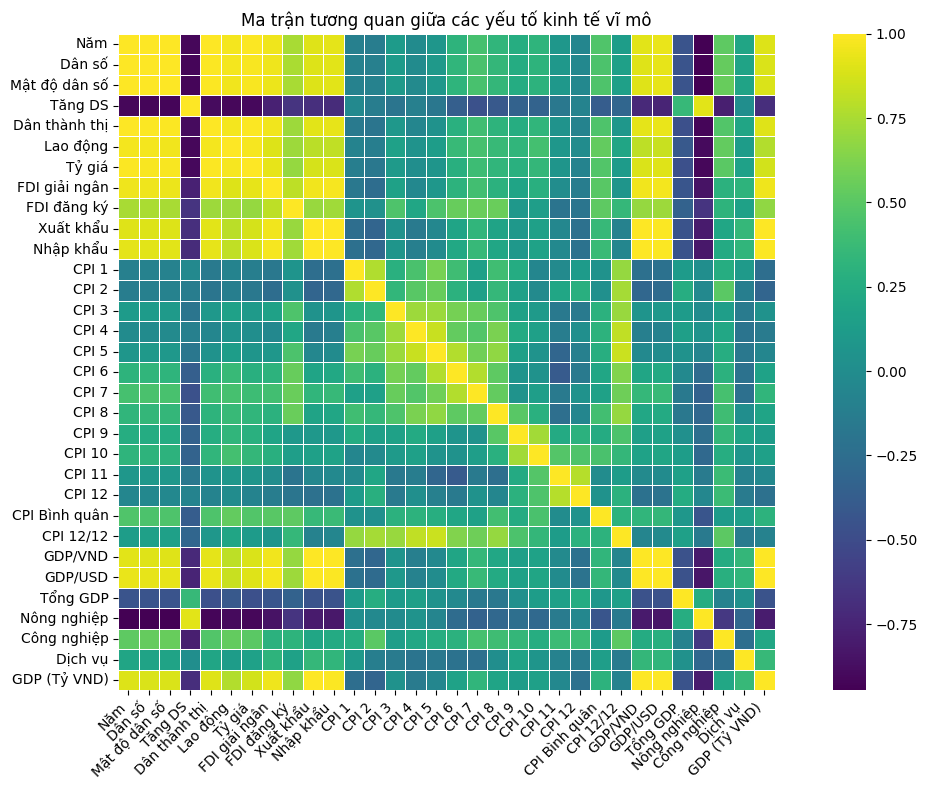

In [68]:
short_columns = {
    "Năm": "Năm",
    "Dân số (Triệu người)": "Dân số",
    "Mật độ dân số (người/km2)": "Mật độ dân số",
    "Tốc độ tăng dân số (%)": "Tăng DS",
    "Tỷ lệ dân thành thị (%)": "Dân thành thị",
    "Số lượng lao động (Triệu người)": "Lao động",
    "Tỷ giá cuối kỳ (VND/USD)": "Tỷ giá",
    "Tổng FDI giải ngân (Triệu USD)": "FDI giải ngân",
    "Tong FDI đăng ký (Triệu USD)": "FDI đăng ký",
    "Giá trị xuất khẩu (USD giá hiện hành) (Triệu USD)": "Xuất khẩu",
    "Giá trị nhập khẩu (USD giá hiện hành) (Triệu USD)": "Nhập khẩu",
    "CPI tháng 1 (%)": "CPI 1",
    "CPI tháng 2 (%)": "CPI 2",
    "CPI tháng 3 (%)": "CPI 3",
    "CPI tháng 4 (%)": "CPI 4",
    "CPI tháng 5 (%)": "CPI 5",
    "CPI tháng 6 (%)": "CPI 6",
    "CPI tháng 7 (%)": "CPI 7",
    "CPI tháng 8 (%)": "CPI 8",
    "CPI tháng 9 (%)": "CPI 9",
    "CPI tháng 10 (%)": "CPI 10",
    "CPI tháng 11 (%)": "CPI 11",
    "CPI tháng 12 (%)": "CPI 12",
    "Bình quân CPI tháng (%)": "CPI Bình quân",
    "CPI tháng 12 năm báo cáo so với tháng 12 năm trước (%)": "CPI 12/12",
    "GDP bình quân (Nghìn VND)": "GDP/VND",
    "GDP bình quân (USD)": "GDP/USD",
    "Tổng GDP (%)": "Tổng GDP",
    "Nông nghiệp (%)": "Nông nghiệp",
    "Công nghiệp (%)": "Công nghiệp",
    "Dịch vụ (%)": "Dịch vụ",
    "GDP theo giá hiện hành (Tỷ VND)": "GDP (Tỷ VND)",
}
# Đổi tên các cột trong dataframe
df_short = df.rename(columns=short_columns)

# Tính toán lại ma trận tương quan với tên biến rút gọn
corr_short = df_short.corr()

# Vẽ heatmap với tên biến rút gọn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_short, annot=False, cmap="viridis", linewidths=0.5, square=True)

# Xoay nhãn trục x và y cho đẹp hơn
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Ma trận tương quan giữa các yếu tố kinh tế vĩ mô")
plt.tight_layout()
plt.show()

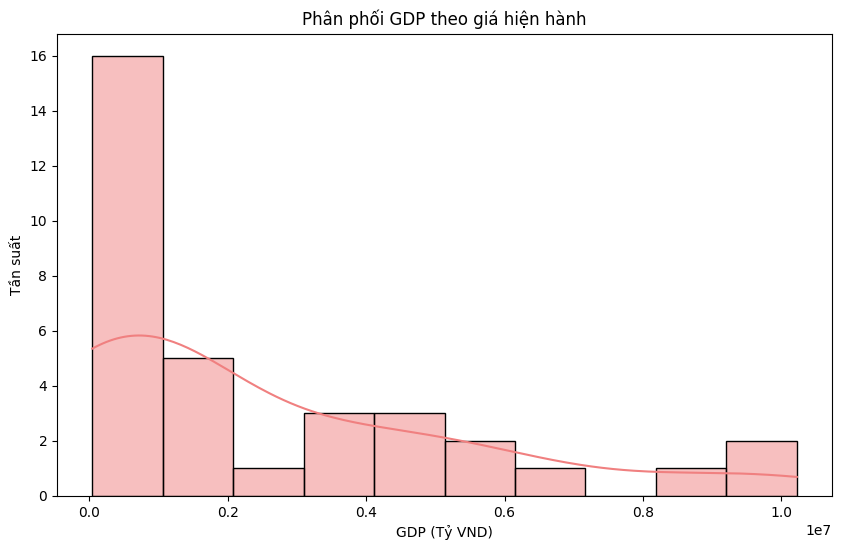

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP theo giá hiện hành (Tỷ VND)'], bins=10, kde=True, color='lightcoral')
plt.title('Phân phối GDP theo giá hiện hành')
plt.xlabel('GDP (Tỷ VND)')
plt.ylabel('Tần suất')
plt.show()


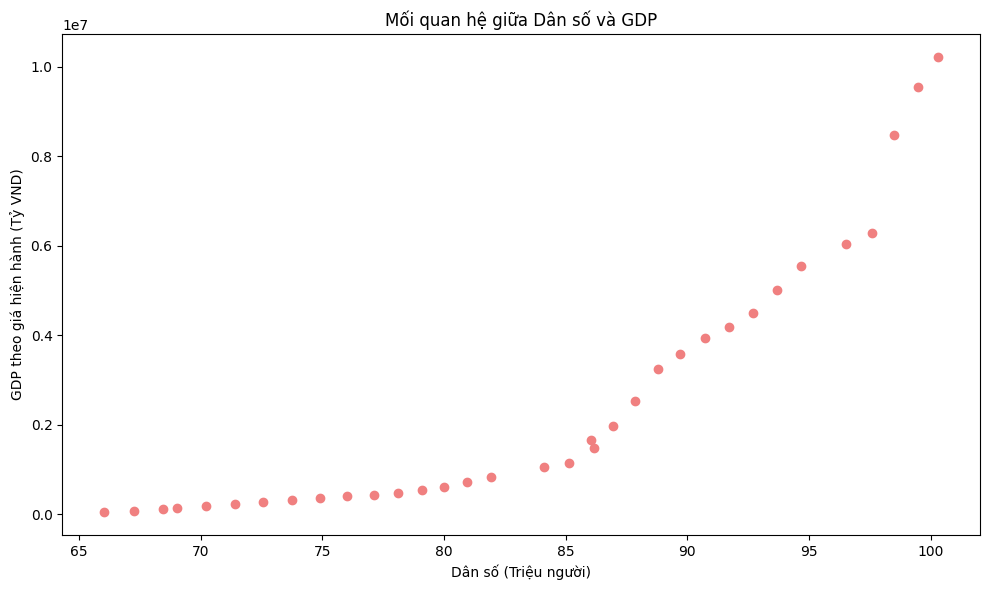

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Dân số (Triệu người)'], df['GDP theo giá hiện hành (Tỷ VND)'], color='lightcoral')
plt.title('Mối quan hệ giữa Dân số và GDP')
plt.xlabel('Dân số (Triệu người)')
plt.ylabel('GDP theo giá hiện hành (Tỷ VND)')
plt.tight_layout()
plt.show()

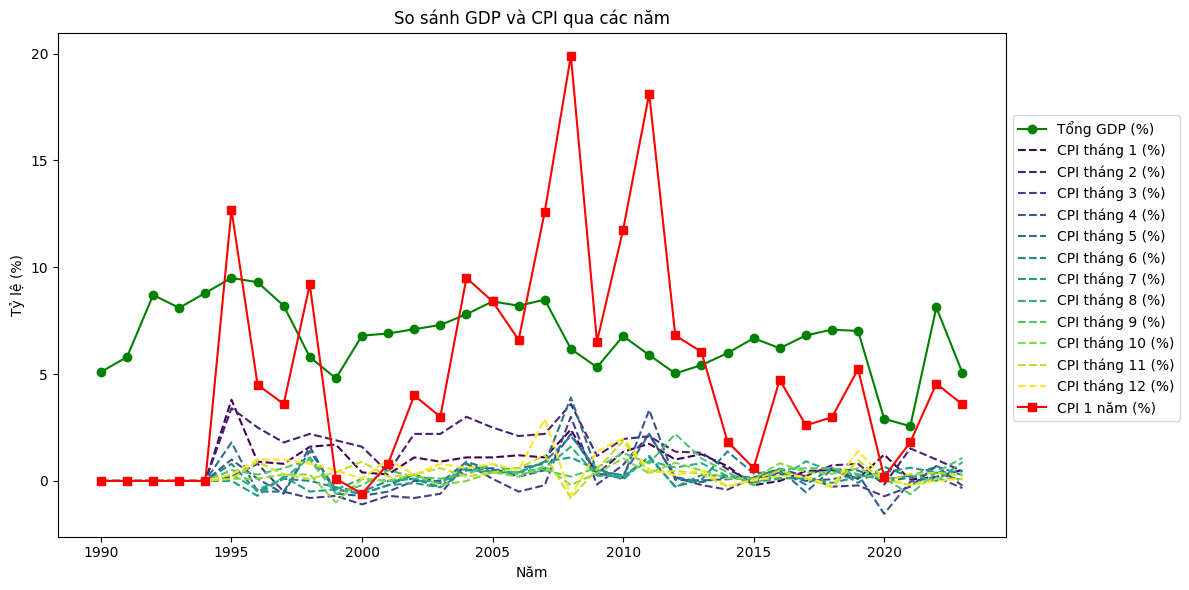

In [61]:
plt.figure(figsize=(12, 6))

# Vẽ đường cho Tổng GDP (%)
plt.plot(df["Năm"], df["Tổng GDP (%)"], label="Tổng GDP (%)", color="green", marker="o")

# Vẽ các đường cho CPI của từng tháng
cpi_columns = [
    "CPI tháng 1 (%)",
    "CPI tháng 2 (%)",
    "CPI tháng 3 (%)",
    "CPI tháng 4 (%)",
    "CPI tháng 5 (%)",
    "CPI tháng 6 (%)",
    "CPI tháng 7 (%)",
    "CPI tháng 8 (%)",
    "CPI tháng 9 (%)",
    "CPI tháng 10 (%)",
    "CPI tháng 11 (%)",
    "CPI tháng 12 (%)",
]

colors = plt.cm.viridis(
    np.linspace(0, 1, len(cpi_columns))
)  # Đặt màu sắc khác nhau cho các CPI tháng

for i, col in enumerate(cpi_columns):
    plt.plot(df["Năm"], df[col], label=col, color=colors[i], linestyle="--")

# Vẽ đường cho CPI bình quân
plt.plot(
    df["Năm"],
    df["CPI tháng 12 năm báo cáo so với tháng 12 năm trước (%)"],
    label="CPI 1 năm (%)",
    color="red",
    marker="s",
)

# Tùy chỉnh tiêu đề, trục x và trục y
plt.title("So sánh GDP và CPI qua các năm")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ (%)")

# Hiển thị chú thích (legend)
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1, 0.85))

# Căn chỉnh layout để đồ thị hiển thị đẹp hơn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()